<a href="https://colab.research.google.com/github/Luffyapo93/Practica/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Cargando modelo entrenado...
✅ Precisión del modelo: 99.07%
📤 Sube tu imagen (PNG o JPG con un número dibujado a mano)...


Saving Sino.png to Sino.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
🔍 Predicción del modelo: 0


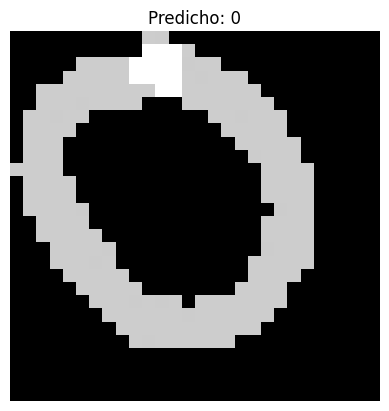

In [15]:
# =========================================

# 1. Importar librerías necesarias

# =========================================

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import cv2

import os



# Para subir imágenes en Colab

from google.colab import files



# =========================================

# 2. Cargar dataset MNIST

# =========================================

(X_train, y_train), (X_test, y_test) = mnist.load_data()



# Normalizar (0-255) → (0-1)

X_train = X_train / 255.0

X_test = X_test / 255.0



# Redimensionar a (28,28,1)

X_train = X_train.reshape(-1, 28, 28, 1)

X_test = X_test.reshape(-1, 28, 28, 1)



# One-hot encoding de etiquetas

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)



# =========================================

# 3. Definir o cargar el modelo

# =========================================

if os.path.exists("mnist_model.h5"):

  print("📂 Cargando modelo entrenado...")

  cnn_model = load_model("mnist_model.h5")

else:

  print("🛠 Entrenando nuevo modelo...")

  cnn_model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')

  ])



  cnn_model.compile(optimizer='adam',

           loss='categorical_crossentropy',

           metrics=['accuracy'])



  cnn_model.fit(X_train, y_train,

         epochs=5, batch_size=32,

         validation_split=0.1)



  cnn_model.save("mnist_model.h5")



# =========================================

# 4. Evaluar el modelo

# =========================================

_, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Precisión del modelo: {accuracy * 100:.2f}%")



# =========================================

# 5. Probar con imagen personalizada

# =========================================

def cargar_y_preprocesar_imagen(ruta_imagen):

  # Leer imagen en escala de grises

  img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)



  # Invertir colores si es necesario (blanco → negro, negro → blanco)

  if np.mean(img) > 127:

    img = cv2.bitwise_not(img)



  # Redimensionar a 28x28

  img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)



  # Normalizar y dar forma para el modelo

  img = img / 255.0

  img = img.reshape(1, 28, 28, 1)

  return img



# Subir imagen en Colab

print("📤 Sube tu imagen (PNG o JPG con un número dibujado a mano)...")

uploaded = files.upload()



for nombre_archivo in uploaded.keys():

  img_procesada = cargar_y_preprocesar_imagen(nombre_archivo)

  prediccion = cnn_model.predict(img_procesada)

  numero_predicho = np.argmax(prediccion)



  # Mostrar resultado

  print(f"🔍 Predicción del modelo: {numero_predicho}")



  # Mostrar imagen

  plt.imshow(img_procesada.reshape(28, 28), cmap='gray')

  plt.title(f"Predicho: {numero_predicho}")

  plt.axis('off')

  plt.show()